# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

Given the historical stock price data for Meta (Facebook), Apple, Amazon, Netflix and Alphabet (Google) over the past year, I want to analyze and compare the performance of these companies in the stock market using various data science techniques.

This topic is relevant as there are numerous banks and financial institutions that would benefit from this analysis in order to help their clients either invest or divest from these companies, and help them make better judgments when holding stocks from these companies in order to maximize profits from these holdings.

This topic primarily is focused on the investment and finance side of companies and not purely on the technology side of it, although certain aspects of these companies would affect the financial side as well.

The target audience would be investors that are either looking to invest in these companies or are currently invested and would like to see how the future performance of the stocks of these companies will be.

The impact of the answer would help investors either decide to include these into their investment portfolios or divest from these companies and utilize other forms of investments.

The main domain knowledge we are relying upon would be the previous historical stock prices of these companies given to us through the stock market.

## Data Understanding

The data will be collected from Yahoo Finance for all five companies within the last year.

The raw data will be straight from Yahoo Finance using pip install yfinance.

The features that will be used are the tickers for the companies as well as start dates and end dates of the stock market price of each company, respectively.


## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [192]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [193]:
import pandas as pd
import numpy as np

import yfinance as yf
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import itertools
import numpy as np
from joblib import Parallel, delayed
from matplotlib.ticker import StrMethodFormatter

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [194]:
# Start date of the stock price 12 months ago to current date
start_date = datetime(2018, 6, 1)
end_date = datetime(2023, 5, 31)

In [195]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200

### Dataframe Information

In [196]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-23  124.930000  125.419998  123.050003  123.290001  123.290001   
       2023-05-24  121.879997  122.750000  120.750000  121.639999  121.639999   
       2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200  
       2018-06-04  18939800  
       2018-06-05  15544300  
       2018-06-06  22558900  
       2018-06-07  21503200  
...                     ...  
GOOG   2023-05-23  24477900  
       2023-05-24  23087900  
       2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700  

[6285 rows x 6 columns]

In [197]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2018-06-01  193.070007  194.550003  192.070007  193.990005  193.990005  \
       2018-06-04  191.839996  193.979996  191.470001  193.279999  193.279999   
       2018-06-05  194.300003  195.000000  192.619995  192.940002  192.940002   
       2018-06-06  191.029999  192.529999  189.110001  191.339996  191.339996   
       2018-06-07  190.750000  190.970001  186.770004  188.179993  188.179993   

                     Volume  
Ticker Date                  
META   2018-06-01  17307200  
       2018-06-04  18939800  
       2018-06-05  15544300  
       2018-06-06  22558900  
       2018-06-07  21503200

In [198]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-23  124.930000  125.419998  123.050003  123.290001  123.290001  \
       2023-05-24  121.879997  122.750000  120.750000  121.639999  121.639999   
       2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   

                     Volume  
Ticker Date                  
GOOG   2023-05-23  24477900  
       2023-05-24  23087900  
       2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6285 entries, ('META', Timestamp('2018-06-01 00:00:00')) to ('GOOG', Timestamp('2023-05-30 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6285 non-null   float64
 1   High       6285 non-null   float64
 2   Low        6285 non-null   float64
 3   Close      6285 non-null   float64
 4   Adj Close  6285 non-null   float64
 5   Volume     6285 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 355.4+ KB


In [200]:
df.describe()

Open         High          Low        Close    Adj Close   
count  6285.000000  6285.000000  6285.000000  6285.000000  6285.000000  \
mean    185.946531   188.591119   183.306143   186.000702   185.719556   
std     130.476227   132.382319   128.412753   130.418168   130.609040   
min      35.994999    36.430000    35.500000    35.547501    34.209961   
25%      92.678497    93.943001    91.529999    92.662498    92.489998   
50%     147.830002   149.399994   145.809998   147.869995   147.187943   
75%     236.059998   240.399994   231.750000   235.789993   235.789993   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  6.285000e+03  
mean   5.124448e+07  
std    5.005849e+07  
min    1.144000e+06  
25%    1.588500e+07  
50%    3.174930e+07  
75%    7.489900e+07  
max    4.265100e+08

In [201]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [202]:
df.index

MultiIndex([('META', '2018-06-01'),
            ('META', '2018-06-04'),
            ('META', '2018-06-05'),
            ('META', '2018-06-06'),
            ('META', '2018-06-07'),
            ('META', '2018-06-08'),
            ('META', '2018-06-11'),
            ('META', '2018-06-12'),
            ('META', '2018-06-13'),
            ('META', '2018-06-14'),
            ...
            ('GOOG', '2023-05-16'),
            ('GOOG', '2023-05-17'),
            ('GOOG', '2023-05-18'),
            ('GOOG', '2023-05-19'),
            ('GOOG', '2023-05-22'),
            ('GOOG', '2023-05-23'),
            ('GOOG', '2023-05-24'),
            ('GOOG', '2023-05-25'),
            ('GOOG', '2023-05-26'),
            ('GOOG', '2023-05-30')],
           names=['Ticker', 'Date'], length=6285)

In [203]:
df.shape

(6285, 6)

In [204]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

Ticker       Date        Open        High         Low       Close   
0      META 2018-06-01  193.070007  194.550003  192.070007  193.990005  \
1      META 2018-06-04  191.839996  193.979996  191.470001  193.279999   
2      META 2018-06-05  194.300003  195.000000  192.619995  192.940002   
3      META 2018-06-06  191.029999  192.529999  189.110001  191.339996   
4      META 2018-06-07  190.750000  190.970001  186.770004  188.179993   
...     ...        ...         ...         ...         ...         ...   
6280   GOOG 2023-05-23  124.930000  125.419998  123.050003  123.290001   
6281   GOOG 2023-05-24  121.879997  122.750000  120.750000  121.639999   
6282   GOOG 2023-05-25  125.209999  125.980003  122.900002  124.349998   
6283   GOOG 2023-05-26  124.065002  126.000000  123.290001  125.430000   
6284   GOOG 2023-05-30  126.290001  126.379997  122.889999  124.639999   

       Adj Close    Volume  
0     193.990005  17307200  
1     193.279999  18939800  
2     192.940002  15544300  
3     191.339996  22558900  
4     188.179993  21503200  
...          ...       ...  
6280  123.290001  24477900  
6281  121.639999  23087900  
6282  124.349998  33812700  
6283  125.430000  25154700  
6284  124.639999  27230700  

[6285 rows x 8 columns]

### Plot Stock Market Performance

In [205]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Five Years")
fig.show();

In [206]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [207]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
            MA10        MA20
1257         NaN         NaN
1258         NaN         NaN
1259         NaN         NaN
1260         NaN         NaN
1261         NaN         NaN
...          ...         ...
2509  173.268002  171.237000
2510  173.096002  171.641000
2511  173.020003  171.870000
2512  173.306001  172.157500
2513  173.829001  172.543001

[1257 rows x 2 columns]
Moving Averages for AMZN
            MA10        MA20
2514         NaN         NaN
2515         NaN         NaN
2516         NaN         NaN
2517         NaN         NaN
2518         NaN         NaN
...          ...         ...
3766  113.713000  109.441001
3767  114.369000  110.029501
3768  114.651000  110.288501
3769  115.636000  111.021501
3770  116.682001  112.002001

[1257 rows x 2 columns]
Moving Averages for GOOG
         MA10       MA20
5028      NaN        NaN
5029      NaN        NaN
5030      NaN        NaN
5031      NaN        NaN
5032      NaN        NaN
...       ...        ...
6280

In [208]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [209]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

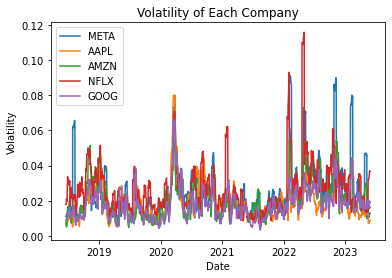

In [210]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

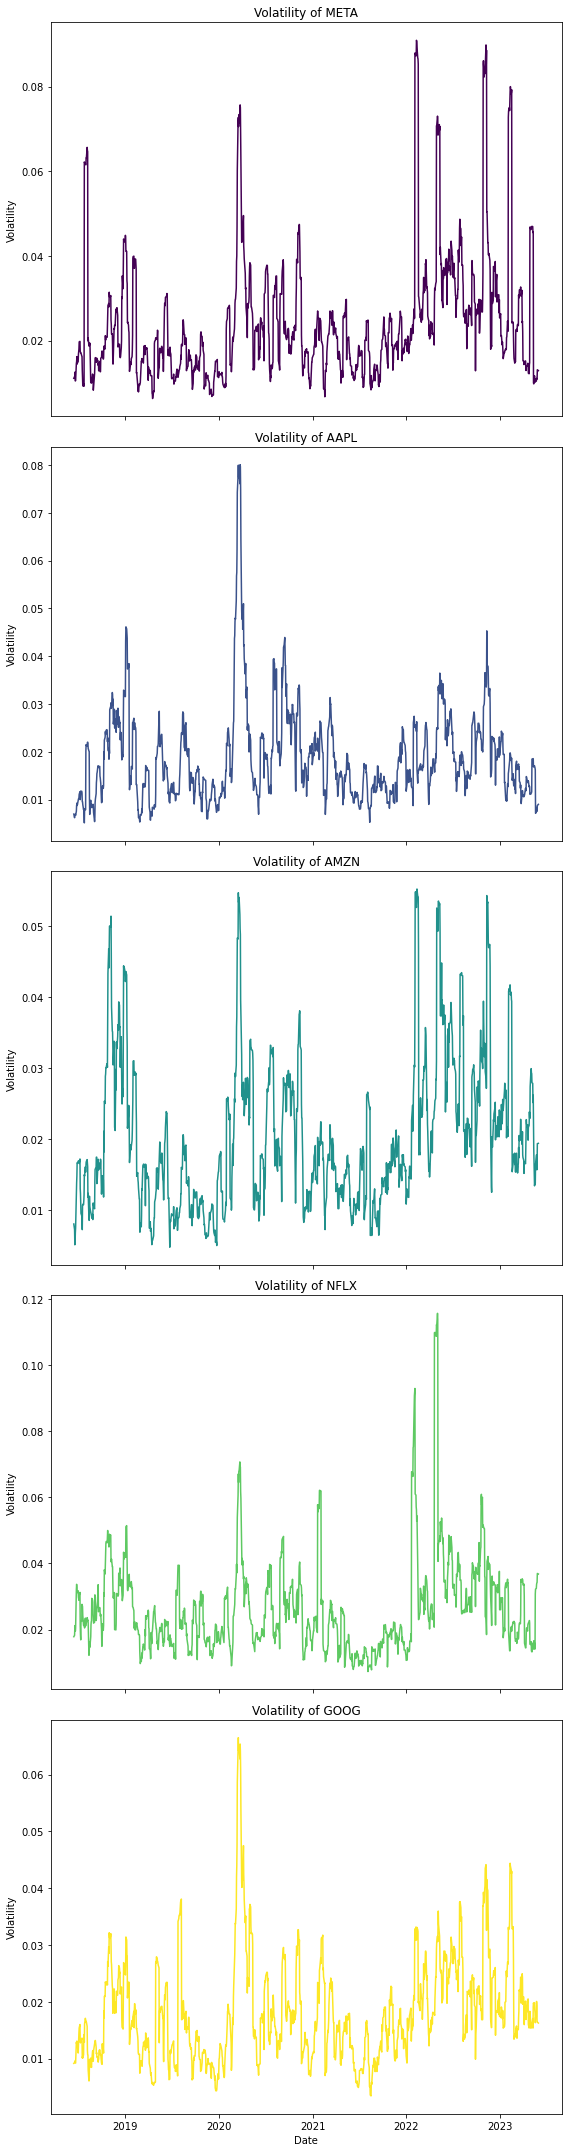

In [211]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## EDA

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      6285 non-null   object        
 1   Date        6285 non-null   datetime64[ns]
 2   Open        6285 non-null   float64       
 3   High        6285 non-null   float64       
 4   Low         6285 non-null   float64       
 5   Close       6285 non-null   float64       
 6   Adj Close   6285 non-null   float64       
 7   Volume      6285 non-null   int64         
 8   MA10        6240 non-null   float64       
 9   MA20        6190 non-null   float64       
 10  Volatility  6235 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 540.2+ KB


In [213]:
df.set_index('Date', inplace=True)

In [214]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### 5 Year Return Model

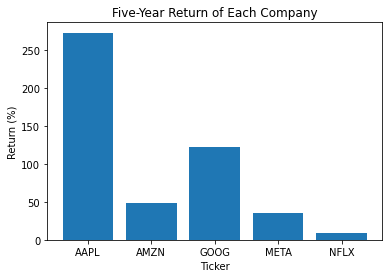

In [215]:
returns = (df.groupby('Ticker')['Close'].last() / df.groupby('Ticker')['Close'].first() - 1) * 100

plt.bar(returns.index, returns)
plt.xlabel('Ticker')
plt.ylabel('Return (%)')
plt.title('Five-Year Return of Each Company')
plt.show()

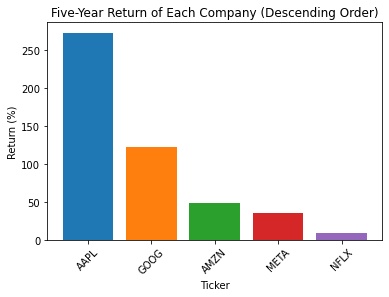

In [216]:
returns_sorted = returns.sort_values(ascending=False)
colors = plt.cm.tab10(range(len(returns_sorted)))

plt.bar(returns_sorted.index, returns_sorted, color=colors)
plt.xlabel('Ticker')
plt.ylabel('Return (%)')
plt.title('Five-Year Return of Each Company (Descending Order)')
plt.xticks(rotation=45)
plt.show()

Apple currently has the highest return of 5 years from all the FAANG companies. Since it has the highest return, we will be focusing more on Apple than each company.

### Time-Series Line Plot

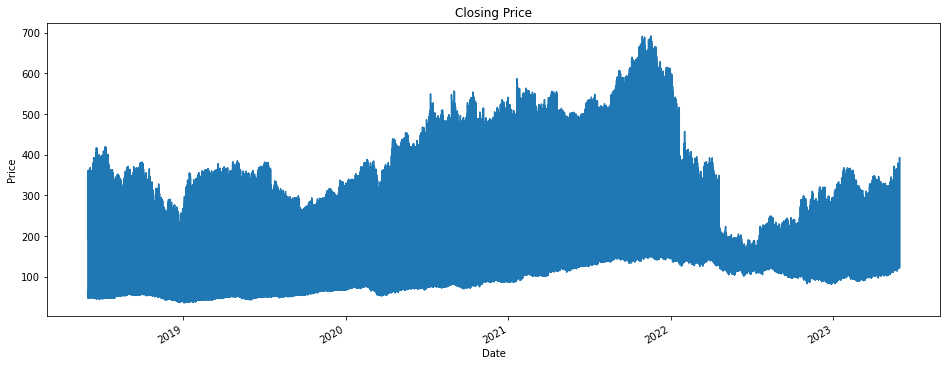

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

# ALL THE COMPANIES
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

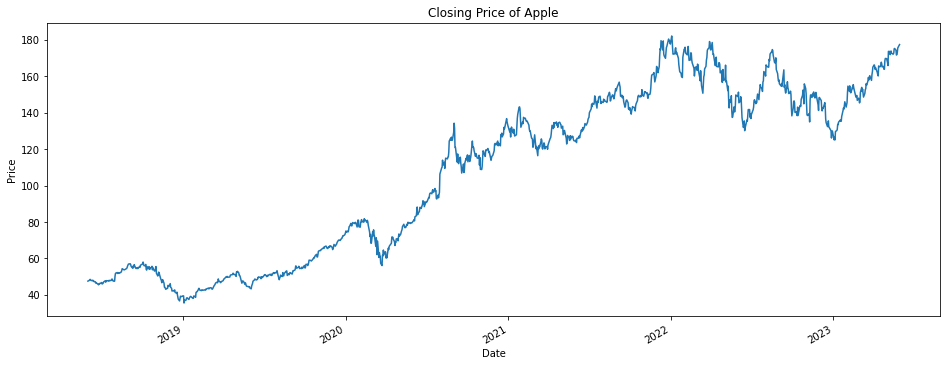

In [218]:
# Filter the DataFrame to include only Apple data
apple_df = df[df['Ticker'] == 'AAPL']

# Plot the closing price of Apple
apple_df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price of Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Time-series Dot Plot

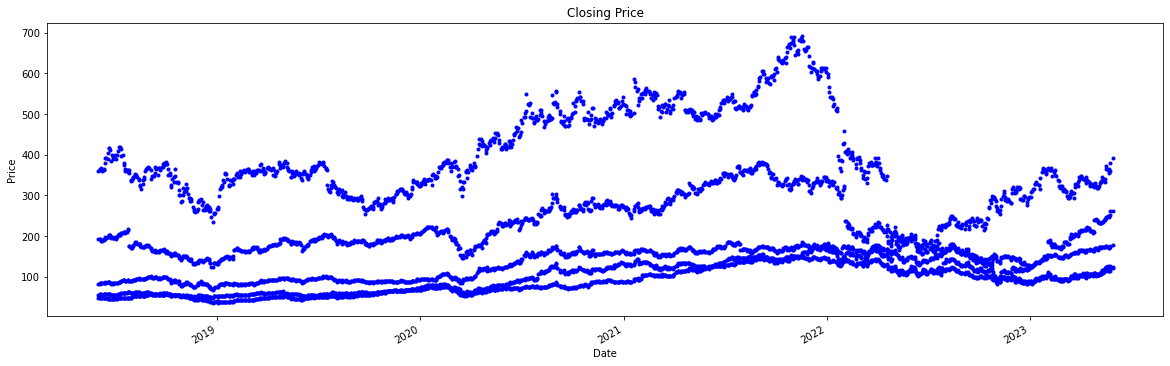

In [219]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

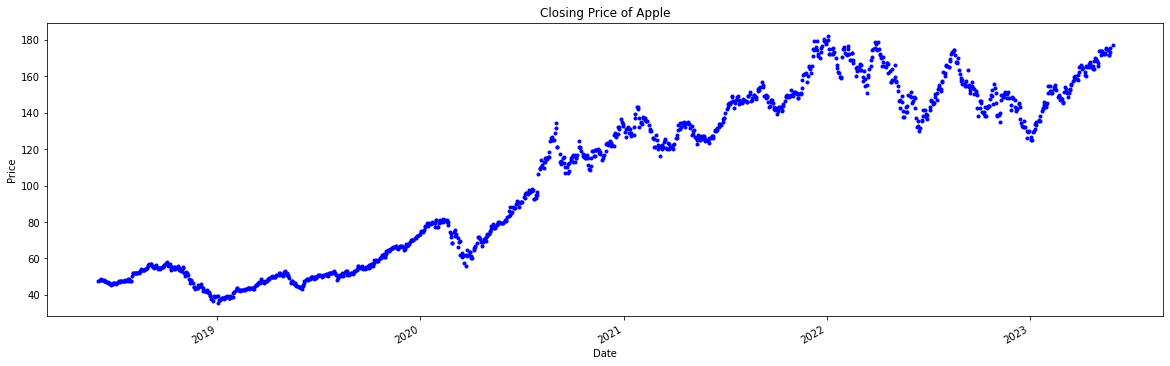

In [220]:
apple_df['Close'].plot(figsize=(20, 6), style='.b')
plt.title('Closing Price of Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Separated Annual Yearly Percentage Change

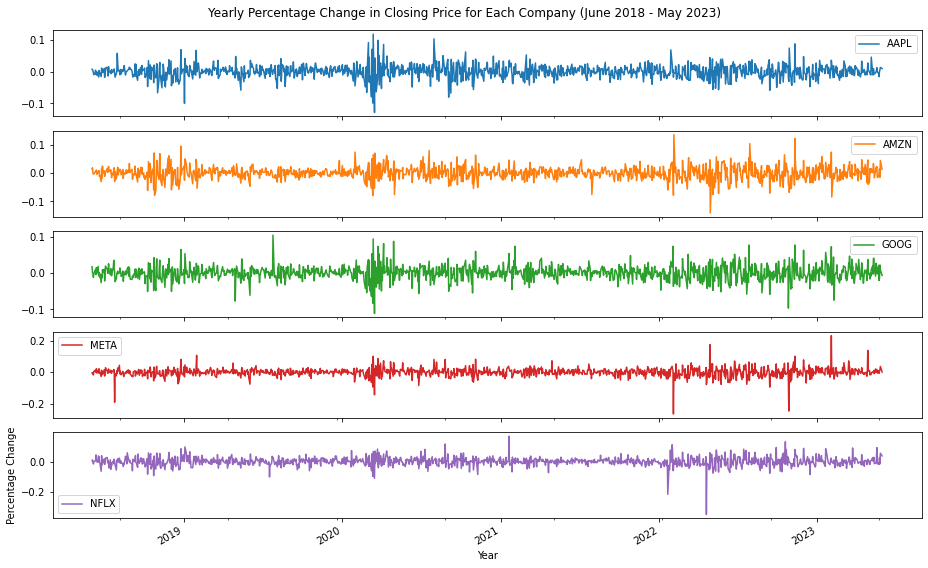

In [221]:
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (June 2018 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

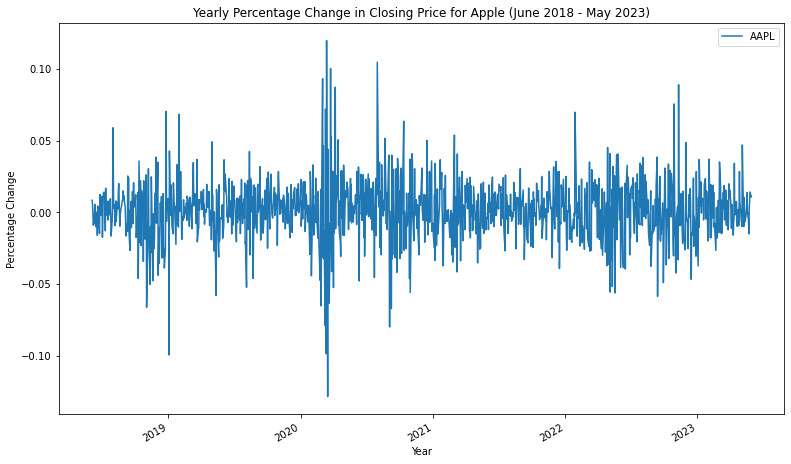

In [222]:
# Select only the column corresponding to Apple (AAPL)
apple_pct_change = df_annual_pct_change['AAPL']

# Plot the annual percentage change of Apple
apple_pct_change.plot(figsize=(13, 8), legend=True)

# Set the plot title and labels
plt.title('Yearly Percentage Change in Closing Price for Apple (June 2018 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Display the plot
plt.show();

### Histogram

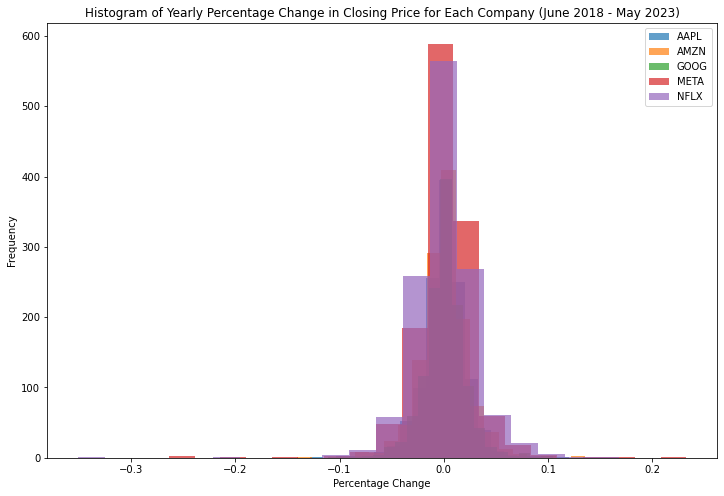

In [223]:
# Plot a histogram for each company
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.hist(df_annual_pct_change[column].dropna(), bins=20, alpha=0.7, label=column)

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Each Company (June 2018 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

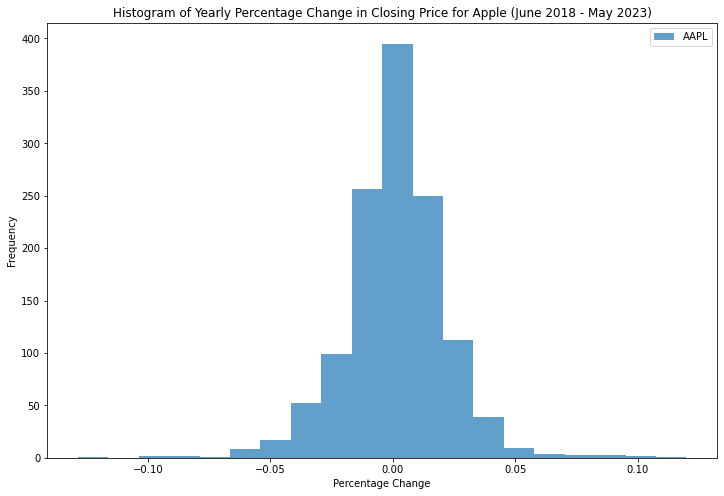

In [224]:
# Plot a histogram for Apple (AAPL) only
plt.figure(figsize=(12, 8))
plt.hist(df_annual_pct_change['AAPL'].dropna(), bins=20, alpha=0.7, label='AAPL')

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Apple (June 2018 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

The histogram illustrates the distribution of yearly percentage changes in the closing prices of different companies' stocks within the specified time range (June 2018 - May 2023). Each histogram represents a specific company, identified by its ticker symbol. 

The x-axis of the histogram represents the range of percentage changes, while the y-axis represents the frequency or count of occurrences for each range. The histogram is divided into bins, where each bin represents a range of percentage changes. The height of each bar in the histogram indicates the number of instances falling within that range.

By analyzing the histogram, we can gain insights into the volatility and distribution of price changes for each company during the given period. A wider and more spread-out distribution suggests higher price volatility, while a narrower distribution indicates more stable price behavior. Additionally, we can identify any patterns or outliers in the data that might be worth investigating further.

### Density Plot 

In [225]:
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

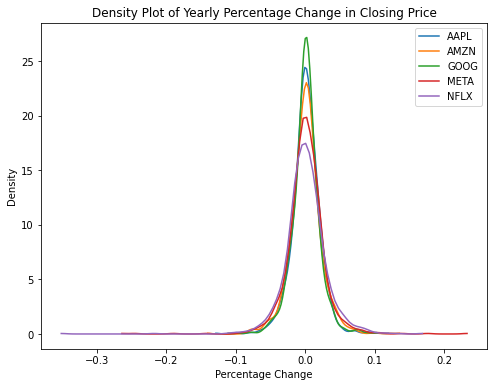

In [226]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each group and create separate density plots
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)

    # Compute the kernel density estimate
    kde = gaussian_kde(pct_change.dropna())

    # Generate x-values for the density plot
    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Plot the density line for the current company
    ax.plot(x, kde(x), label=ticker)

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

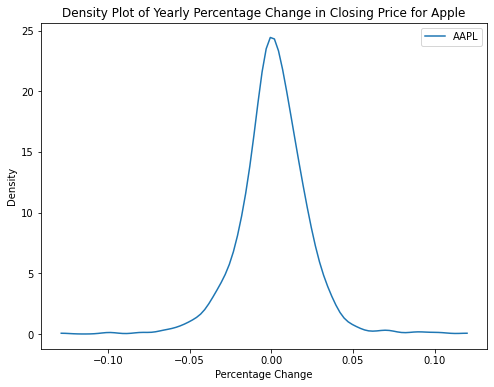

In [227]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the percentage change of the closing prices for Apple (AAPL)
pct_change_apple = df_annual_pct_change['AAPL'].dropna()

# Compute the kernel density estimate for Apple (AAPL)
kde = gaussian_kde(pct_change_apple)

# Generate x-values for the density plot
x = np.linspace(pct_change_apple.min(), pct_change_apple.max(), num=100)

# Plot the density line for Apple (AAPL)
ax.plot(x, kde(x), label='AAPL')

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price for Apple')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

it seems that the density plot for the yearly percentage change in closing price of Apple (AAPL) exhibits a peak around 25 on the x-axis, indicating a relatively high concentration or likelihood of occurrence for percentage change values around that point. The distribution appears to be roughly symmetric, with the data being evenly distributed within the range of approximately -14% to 14% on the x-axis.

The peak around 25 suggests that there may have been periods of relatively higher yearly percentage increases in the closing price of Apple stock during the analyzed time period. The even distribution of data within the range of -14% to 14% indicates that there is no strong skewness or bias towards positive or negative percentage changes, and the occurrences are spread out relatively evenly across that range.

### Box Plot
- Shows distributiions of the closing price of each company in FAANG

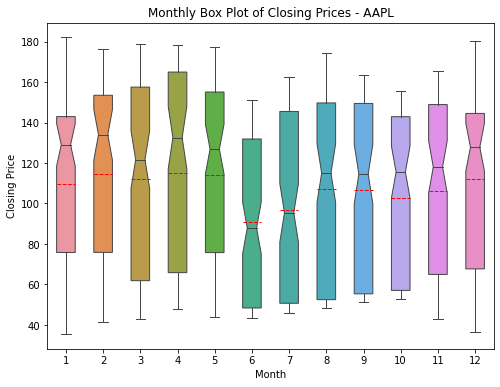

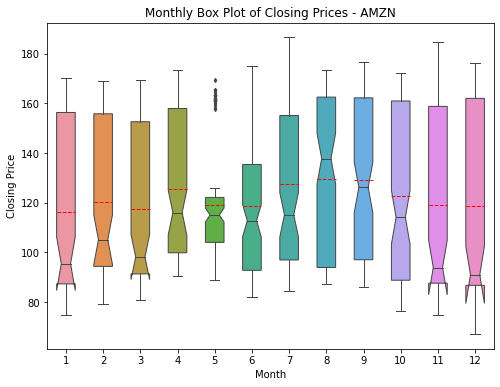

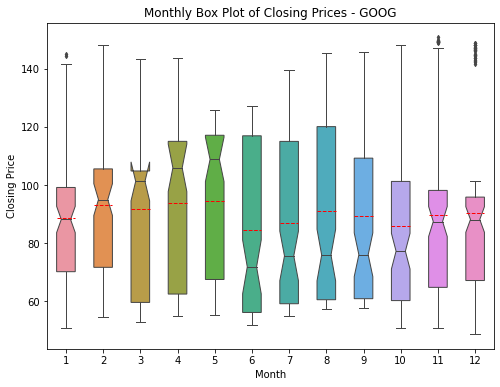

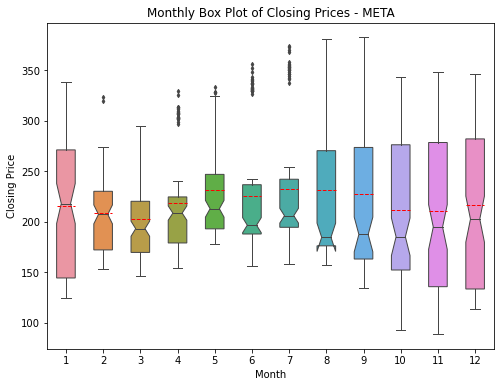

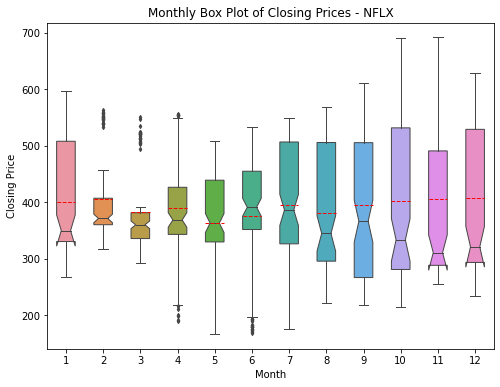

In [228]:
# Set the desired time range
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker'
groups = df_filtered.groupby('Ticker')

# Iterate over each group and create a separate box plot for each company
for ticker, group in groups:
    # Create a new figure and axis for each company
    fig, ax = plt.subplots(figsize=(8, 6))

    # Extract the closing prices for the current company
    closing_prices = group['Close']

    # Create the box plot for the current company
    sns.boxplot(x=group.index.month, y=closing_prices, ax=ax, width=0.5, linewidth=1, fliersize=3, whis=1.5, notch=True, showfliers=True, showmeans=True, meanline=True, meanprops={'color': 'red', 'linestyle': '--'})

    # Set the plot title and labels
    ax.set_title(f'Monthly Box Plot of Closing Prices - {ticker}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Closing Price')

    # Display the plot
    plt.show();

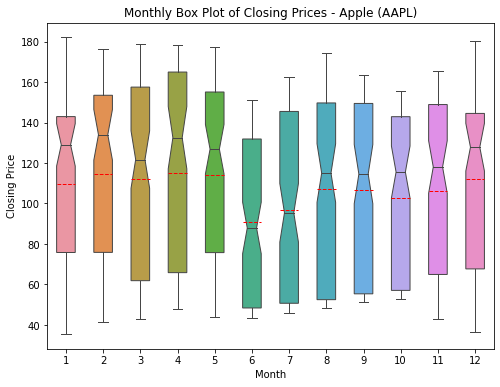

In [229]:
# Filter the DataFrame for Apple (AAPL) only
df_apple = df_filtered[df_filtered['Ticker'] == 'AAPL']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract the closing prices for Apple
closing_prices = df_apple['Close']

# Create the box plot for Apple
sns.boxplot(x=df_apple.index.month, y=closing_prices, ax=ax, width=0.5, linewidth=1, fliersize=3, whis=1.5, notch=True, showfliers=True, showmeans=True, meanline=True, meanprops={'color': 'red', 'linestyle': '--'})

# Set the plot title and labels
ax.set_title('Monthly Box Plot of Closing Prices - Apple (AAPL)')
ax.set_xlabel('Month')
ax.set_ylabel('Closing Price')

# Display the plot
plt.show();

### Heat Maps

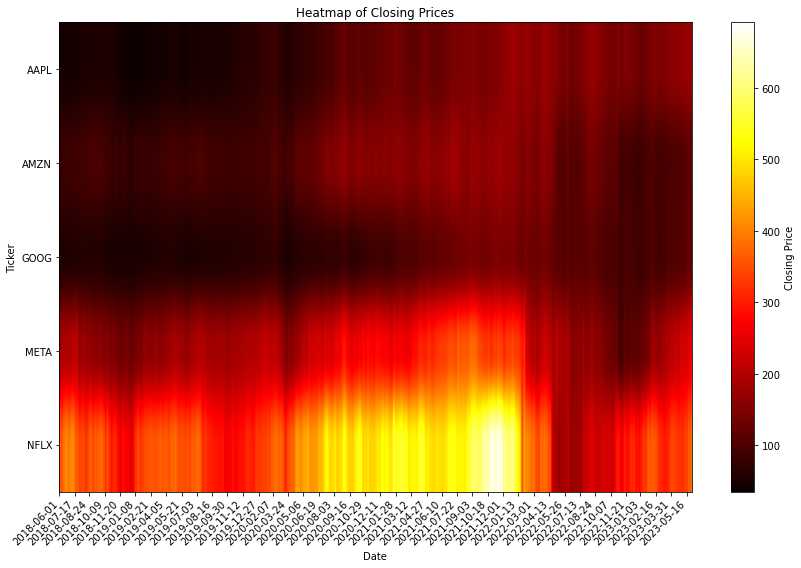

In [230]:
import matplotlib.dates as mdates

# Pivot the DataFrame to have 'Ticker' as columns and 'Date' as index
pivot_df = df_filtered.pivot(columns='Ticker', values='Close')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

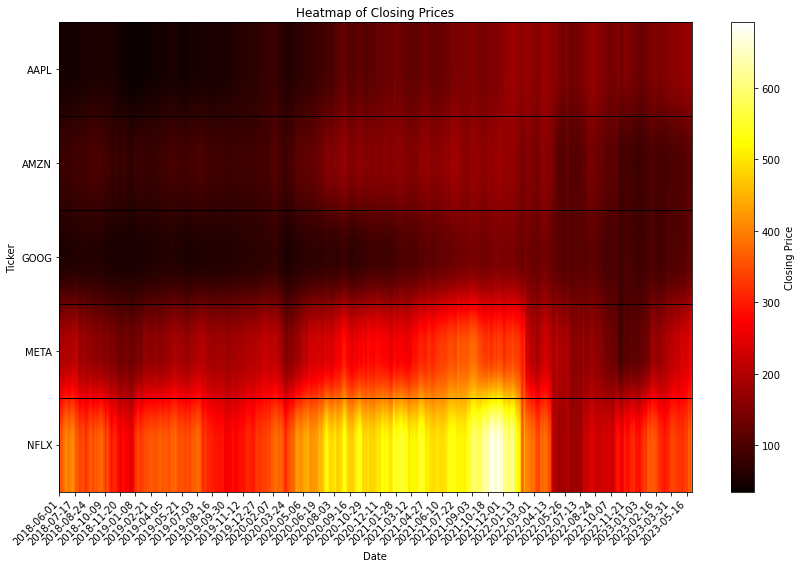

In [231]:
from matplotlib.patches import Rectangle

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add boxes for each company
for i in range(len(pivot_df.columns)):
    rect = Rectangle((-0.5, i - 0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
    ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

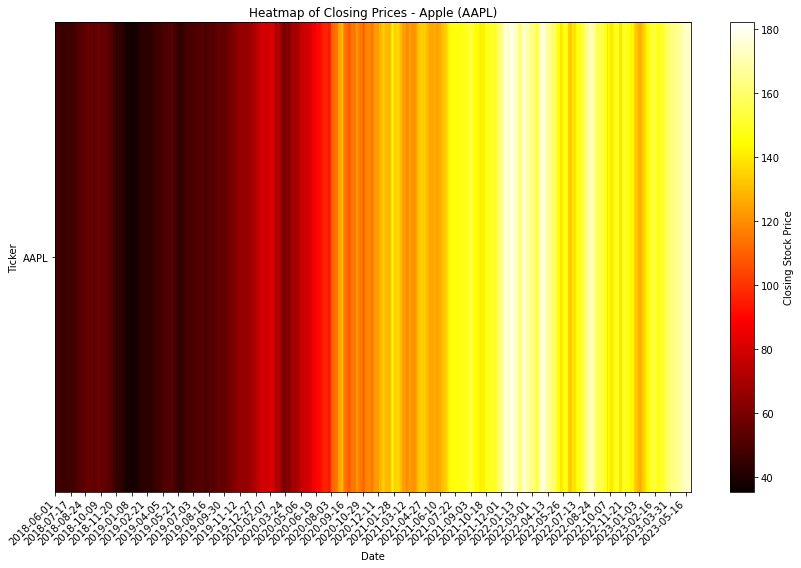

In [232]:
# Create the heatmap for Apple
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df['AAPL'].values.reshape(1, -1), cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = [0]  # Only one company, so set a single tick position
y_tick_labels = ['AAPL']  # Set the label for Apple
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add a box for Apple
rect = Rectangle((-0.5, -0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Stock Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices - Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

### Check for Stationarity 

In [233]:
# Filter the DataFrame for the desired time range
df_filtered_AP = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'AAPL'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)
print(result_AP)

(-0.651976488168687, 0.8587997952960009, 1, 1255, {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}, 5581.2426582955395)


In [234]:
# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_AP[0])
print("p-value:", result_AP[1])
print("Critical Values:")
for key, value in result_AP[4].items():
    print(f"{key} (at {value} critical value): {result_AP[4][key]}")
print("Is Stationary:", result_AP[1] < 0.05)

ADF Statistic: -0.651976488168687
p-value: 0.8587997952960009
Critical Values:
1% (at -3.435571295403709 critical value): -3.435571295403709
5% (at -2.863845736356174 critical value): -2.863845736356174
10% (at -2.567997600196822 critical value): -2.567997600196822
Is Stationary: False


### DIfference Transformation

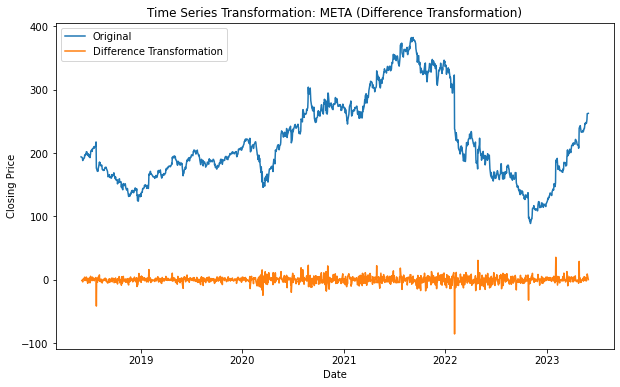

Augmented Dickey-Fuller Test: META (Difference Transformation)
Test Statistic: -21.68140684314075
P-value: 0.0
Critical Values: {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}



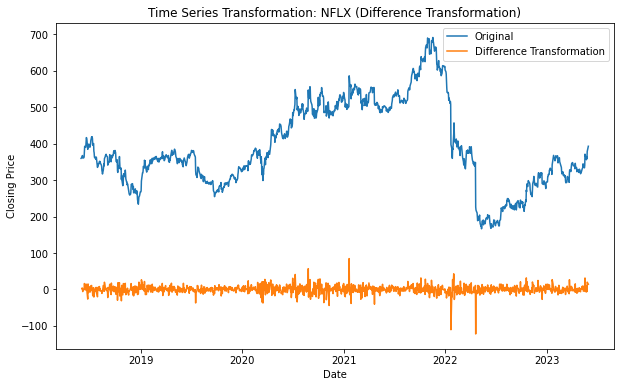

Augmented Dickey-Fuller Test: NFLX (Difference Transformation)
Test Statistic: -36.755241543402065
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



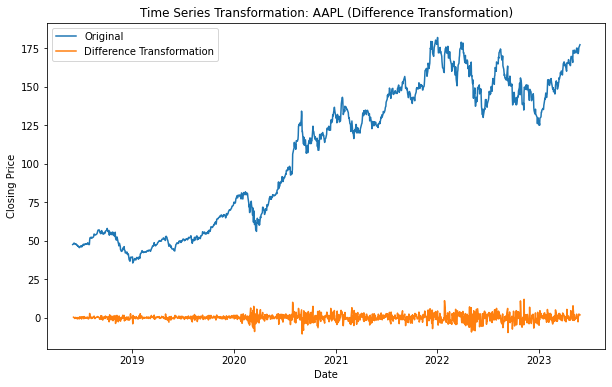

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



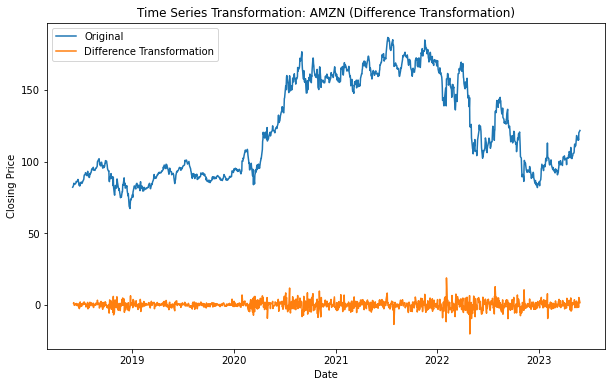

Augmented Dickey-Fuller Test: AMZN (Difference Transformation)
Test Statistic: -36.25872299152099
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



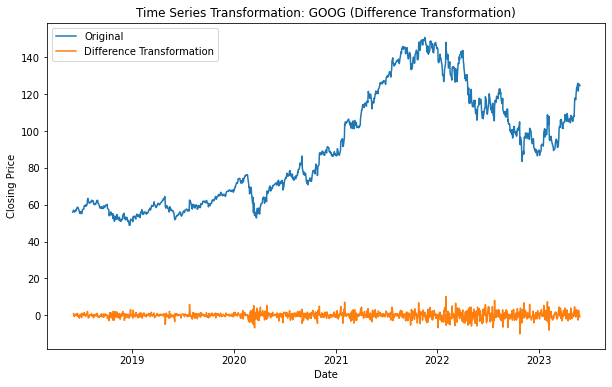

Augmented Dickey-Fuller Test: GOOG (Difference Transformation)
Test Statistic: -37.24110705598108
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}



In [235]:
# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Perform the first difference transformation on the series
    diff_series = time_series.diff().dropna()
    
    # Perform the Augmented Dickey-Fuller test on the differenced series
    result_diff = adfuller(diff_series)
    
    # Plot the original and differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Original')
    plt.plot(diff_series, label='Difference Transformation')
    plt.title(f'Time Series Transformation: {ticker} (Difference Transformation)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    
    # Print the Augmented Dickey-Fuller test result
    print(f'Augmented Dickey-Fuller Test: {ticker} (Difference Transformation)')
    print(f'Test Statistic: {result_diff[0]}')
    print(f'P-value: {result_diff[1]}')
    print(f'Critical Values: {result_diff[4]}')
    print('')

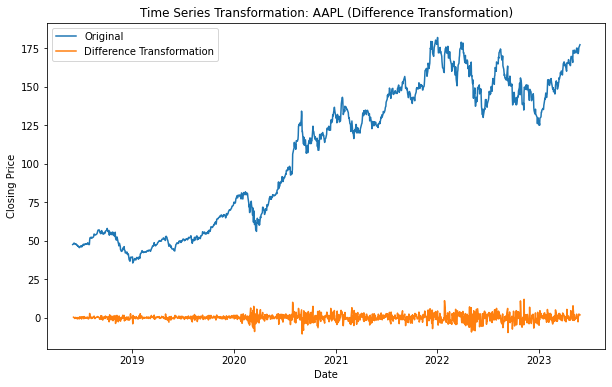

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


In [236]:
# Select the closing price of Apple for the time series analysis
time_series = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

# Perform the first difference transformation on the series
diff_series = time_series.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_series)

# Plot the original and differenced series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(diff_series, label='Difference Transformation')
plt.title('Time Series Transformation: AAPL (Difference Transformation)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Print the Augmented Dickey-Fuller test result
print('Augmented Dickey-Fuller Test: AAPL (Difference Transformation)')
print(f'Test Statistic: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

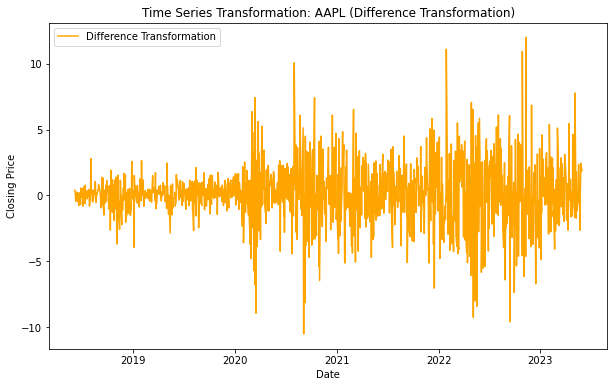

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -37.38906184794579
P-value: 0.0
Critical Values: {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


In [237]:
# Select the closing price of Apple for the time series analysis
time_series = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

# Perform the first difference transformation on the series
diff_series = time_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(diff_series, label='Difference Transformation', color='orange')
plt.title('Time Series Transformation: AAPL (Difference Transformation)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_series)

# Print the Augmented Dickey-Fuller test result
print('Augmented Dickey-Fuller Test: AAPL (Difference Transformation)')
print(f'Test Statistic: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

The test statistic value of -37.38906184794579 is highly significant, and the p-value of 0.0 indicates strong evidence against the null hypothesis of a unit root in the differenced series. Therefore, we can conclude that the difference-transformed series of Apple's closing prices is stationary.

The critical values provide a comparison to the test statistic. If the test statistic is lower than the critical values at a certain significance level (1%, 5%, or 10%), we can reject the null hypothesis. In this case, the test statistic is far lower than all the critical values, further supporting the rejection of the null hypothesis and the presence of stationarity in the differenced series.

## Model

So I will be going forward with looking into the predicted Stock Price of Apple after May 2023 as it has the biggest return on investment in a 5-year period compared to Facebook, Amazon, Netflix, and Google. 

The modeling techniques used for these predictions would be an Autoregressive (AR), ARMA, ARIMA, and SARIMA model.

The target Variable is the stock price of Apple in USD and the dependent variable is the time from June 2018 to May 2023.

### Train-Test Split

In [238]:
apple_prices = df_filtered[df_filtered['Ticker'] == 'AAPL']['Close']

In [239]:
apple_prices

Date
2018-06-01     47.560001
2018-06-04     47.957500
2018-06-05     48.327499
2018-06-06     48.494999
2018-06-07     48.365002
                 ...    
2023-05-23    171.559998
2023-05-24    171.839996
2023-05-25    172.990005
2023-05-26    175.429993
2023-05-30    177.300003
Name: Close, Length: 1257, dtype: float64

In [240]:
apple_prices.shape[0]*.8

1005.6

In [241]:
apple_prices_wk = apple_prices.resample(rule="W").mean()
apple_prices_wk

Date
2018-06-03     47.560001
2018-06-10     48.214000
2018-06-17     47.692500
2018-06-24     46.565501
2018-07-01     46.068500
                 ...    
2023-05-07    168.987997
2023-05-14    173.030002
2023-05-21    173.408005
2023-05-28    173.203998
2023-06-04    177.300003
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

In [242]:
cutoff = round(apple_prices_wk.shape[0]*.8)
cutoff

210

In [243]:
train_data = apple_prices_wk[:cutoff]
test_data = apple_prices_wk[cutoff:]

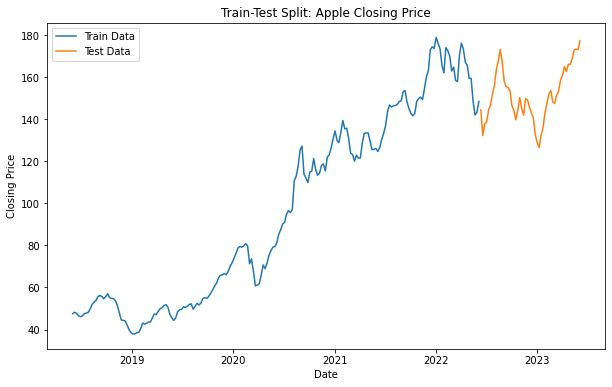

In [244]:
# Plot the train and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.title('Train-Test Split: Apple Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show();

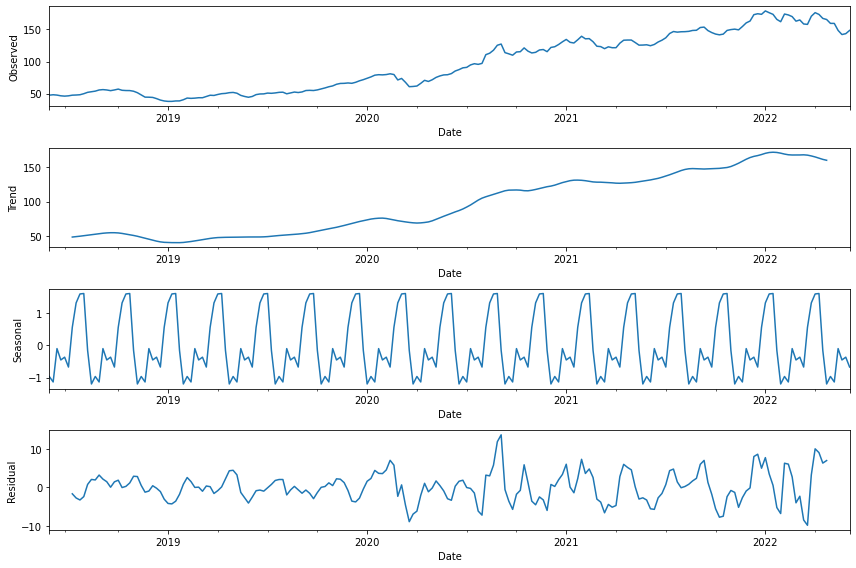

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the train data
decomposition = seasonal_decompose(train_data, model='additive', period=12)  # Adjust the period based on the seasonality of your data

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [246]:
#SARIMAX model, every 12 weeks

In [247]:
decomposition.seasonal

Date
2018-06-03   -0.965549
2018-06-10   -1.134935
2018-06-17   -0.102922
2018-06-24   -0.454103
2018-07-01   -0.368268
                ...   
2022-05-08   -1.134935
2022-05-15   -0.102922
2022-05-22   -0.454103
2022-05-29   -0.368268
2022-06-05   -0.673650
Freq: W-SUN, Name: seasonal, Length: 210, dtype: float64

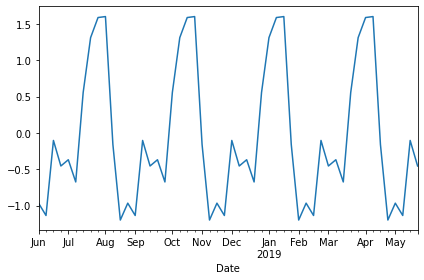

In [248]:
decomposition.seasonal[0:52].plot()

ax3.set_ylabel('Seasonal')
plt.tight_layout()
plt.show()

### Baseline Model

In [249]:
train_data

Date
2018-06-03     47.560001
2018-06-10     48.214000
2018-06-17     47.692500
2018-06-24     46.565501
2018-07-01     46.068500
                 ...    
2022-05-08    159.502002
2022-05-15    148.547998
2022-05-22    142.108002
2022-05-29    143.482001
2022-06-05    148.535004
Freq: W-SUN, Name: Close, Length: 210, dtype: float64

In [250]:
naive = train_data.shift(1)
naive

Date
2018-06-03           NaN
2018-06-10     47.560001
2018-06-17     48.214000
2018-06-24     47.692500
2018-07-01     46.565501
                 ...    
2022-05-08    159.508002
2022-05-15    159.502002
2022-05-22    148.547998
2022-05-29    142.108002
2022-06-05    143.482001
Freq: W-SUN, Name: Close, Length: 210, dtype: float64

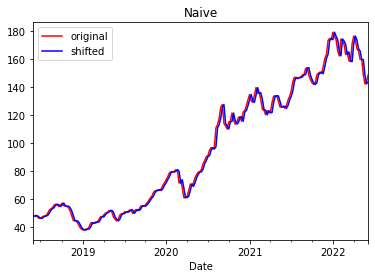

In [251]:
fig, ax = plt.subplots()

train_data.plot(ax=ax, c='r', label='original')
naive.plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

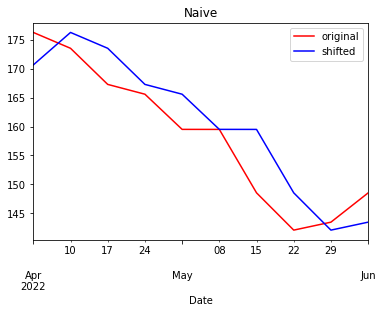

In [252]:
fig, ax = plt.subplots()

train_data[200:236].plot(ax=ax, c='r', label='original')
naive[200:236].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [253]:
mean_squared_error(train_data[1:], naive.dropna(), squared=False)

3.551786294748958

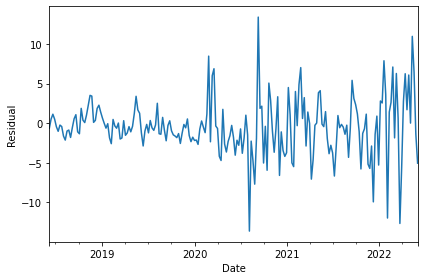

In [254]:
residuals = naive[1:] - train_data[1:]

# Plot the residuals
fig, ax = plt.subplots()
residuals.plot(ax=ax)
ax.set_ylabel('Residual')
plt.tight_layout()
plt.show()

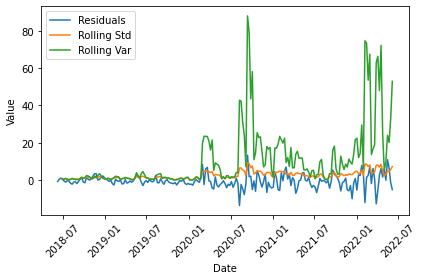

In [255]:
fig, ax = plt.subplots()

# Plot residuals
ax.plot(residuals.index.to_numpy(), residuals.to_numpy(), label='Residuals')

# Calculate rolling standard deviation and variance
rolling_std = residuals.rolling(4).std()
rolling_var = residuals.rolling(4).var()

# Plot rolling standard deviation
ax.plot(rolling_std.index.to_numpy(), rolling_std.to_numpy(), label='Rolling Std')

# Plot rolling variance
ax.plot(rolling_var.index.to_numpy(), rolling_var.to_numpy(), label='Rolling Var')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.tight_layout()
plt.show()

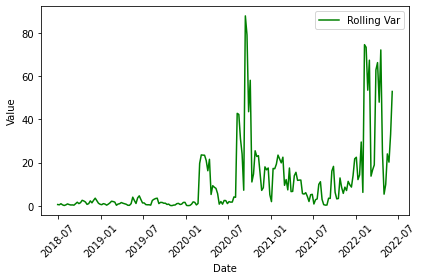

In [256]:
# Plot rolling variance
fig, ax = plt.subplots()

ax.plot(rolling_var.index.to_numpy(), rolling_var.to_numpy(), label='Rolling Var', color='green')

plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.tight_layout()
plt.show()

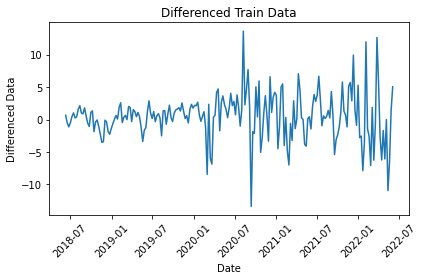

In [257]:
# Calculate differenced data
differenced_data = train_data.diff().dropna()

# Plot differenced data
fig, ax = plt.subplots()
ax.plot(differenced_data.index.to_numpy(), differenced_data.to_numpy())

plt.xticks(rotation=45)

ax.set_title('Differenced Train Data')
ax.set_xlabel('Date')
ax.set_ylabel('Differenced Data')

plt.tight_layout()
plt.show()

### Difference Stationary

In [258]:
adfuller(differenced_data[1:])

(-11.07646515228825,
 4.4198436846352886e-20,
 0,
 207,
 {'1%': -3.4623415245233145,
  '5%': -2.875606128263243,
  '10%': -2.574267439846904},
 1035.281923282286)

In [259]:
test_statistic = adfuller(differenced_data[1:])[0]
p_val = adfuller(differenced_data[1:])[1]

print(f"Test Statistic: {test_statistic}")
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")

# Interpret the results
if p_val < 0.05:
    print("The difference data is stationary (reject the null hypothesis)")
else:
    print("The difference data is non-stationary (fail to reject the null hypothesis)")

Test Statistic: -11.07646515228825
The p-value associated with the Dickey-Fuller statistical test is 4.4198436846352886e-20,
The difference data is stationary (reject the null hypothesis)


### Partial Auto-Correleation and Auto-Correleation

#### PACF

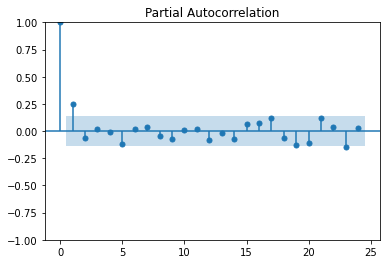

In [260]:
plot_pacf(differenced_data);

#### ACF

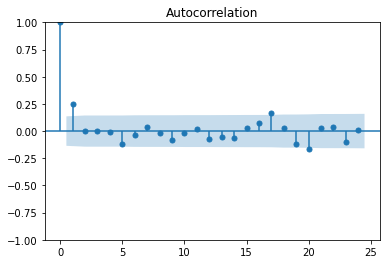

In [261]:
plot_acf(differenced_data);

# The Autoregressive Model (AR)

In [262]:
ar_1= ARIMA(train_data, order=(1, 1, 0)).fit()

In [263]:
ar_1.predict()

Date
2018-06-03      0.000000
2018-06-10     47.560157
2018-06-17     48.383749
2018-06-24     47.557141
2018-07-01     46.272981
                 ...    
2022-05-08    157.931460
2022-05-15    159.500445
2022-05-22    145.704821
2022-05-29    140.436462
2022-06-05    143.838630
Freq: W-SUN, Name: predicted_mean, Length: 210, dtype: float64

In [264]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -554.204
Date:                Fri, 16 Jun 2023   AIC                           1112.408
Time:                        15:54:35   BIC                           1119.092
Sample:                    06-03-2018   HQIC                          1115.110
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2596      0.073      3.565      0.000       0.117       0.402
sigma2        11.7655      0.703     16.742      0.000      10.388      13.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               108.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.66   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [265]:
ar_1.aic

1112.4075553301113

### Random Walk Model

In [266]:
rwm = ARIMA(train_data, order=(0, 1, 0)).fit()
rwm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -561.455
Date:                Fri, 16 Jun 2023   AIC                           1124.911
Time:                        15:54:35   BIC                           1128.253
Sample:                    06-03-2018   HQIC                          1126.262
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.6152      0.807     15.633      0.000      11.034      14.197
===================================================================================
Ljung-Box (L1) (Q):                  12.75   Jarque-Bera (JB):                68.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.23   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
print(f'Random Walk AIC: {rwm.aic}')
print(f'AR(1, 1, 0) AIC: {ar_1.aic}' )

Random Walk AIC: 1124.9106821548482
AR(1, 1, 0) AIC: 1112.4075553301113


In [268]:
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train_data[1:], y_hat_ar1[1:], squared=False)

3.430112929463177

In [269]:
y_hat_rw = rwm.predict(typ='levels')
np.sqrt(mean_squared_error(train_data[1:], y_hat_rw[1:]))

3.5517862947489647

In general, a model with a lower AIC value is considered better. The AIC is a criterion that balances the goodness of fit of a model with its complexity. It penalizes models with more parameters, favoring simpler models that explain the data well.

Based on the provided AIC values, the AR(1, 1, 0) model has a lower AIC value (1112.4075553301113) compared to the Random Walk model (1124.9106821548482). Therefore, the AR(1, 1, 0) model is considered better in terms of the AIC criterion.

### Cross-Validation

In [270]:
train_data

Date
2018-06-03     47.560001
2018-06-10     48.214000
2018-06-17     47.692500
2018-06-24     46.565501
2018-07-01     46.068500
                 ...    
2022-05-08    159.502002
2022-05-15    148.547998
2022-05-22    142.108002
2022-05-29    143.482001
2022-06-05    148.535004
Freq: W-SUN, Name: Close, Length: 210, dtype: float64

In [271]:
train_data.index

DatetimeIndex(['2018-06-03', '2018-06-10', '2018-06-17', '2018-06-24',
               '2018-07-01', '2018-07-08', '2018-07-15', '2018-07-22',
               '2018-07-29', '2018-08-05',
               ...
               '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24',
               '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
               '2022-05-29', '2022-06-05'],
              dtype='datetime64[ns]', name='Date', length=210, freq='W-SUN')

In [272]:
train_w_ind = train_data.reset_index()
train_w_ind

Date       Close
0   2018-06-03   47.560001
1   2018-06-10   48.214000
2   2018-06-17   47.692500
3   2018-06-24   46.565501
4   2018-07-01   46.068500
..         ...         ...
205 2022-05-08  159.502002
206 2022-05-15  148.547998
207 2022-05-22  142.108002
208 2022-05-29  143.482001
209 2022-06-05  148.535004

[210 rows x 2 columns]

In [273]:
# sklearn.model_selection.TimeSeriesSplit
split = TimeSeriesSplit()

In [274]:
split

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [275]:
for train_ind, val_ind in split.split(train_w_ind):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104] 

In [276]:
train_w_ind.iloc[train_ind, -1]

0       47.560001
1       48.214000
2       47.692500
3       46.565501
4       46.068500
          ...    
170    153.081998
171    153.710003
172    148.309998
173    145.194000
174    142.851999
Name: Close, Length: 175, dtype: float64

In [277]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

10.764022146853645
17.010899572351782
36.94279765595997
11.792001502092061
22.637880135195946


In [278]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.764022146853645
Fold 2: RMSE = 17.010899572351782
Fold 3: RMSE = 36.94279765595997
Fold 4: RMSE = 11.792001502092061
Fold 5: RMSE = 22.637880135195946


### Adding a Term

In [279]:
ar_2 = ARIMA(train_data, order=(2,1,0)).fit()

ar_2.predict(typ='levels')

Date
2018-06-03      0.000000
2018-06-10     47.560157
2018-06-17     48.383702
2018-06-24     47.518821
2018-07-01     46.284139
                 ...    
2022-05-08    157.937314
2022-05-15    159.795369
2022-05-22    145.567383
2022-05-29    140.887499
2022-06-05    144.168682
Freq: W-SUN, Name: predicted_mean, Length: 210, dtype: float64

In [280]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -553.958
Date:                Fri, 16 Jun 2023   AIC                           1113.917
Time:                        15:54:36   BIC                           1123.944
Sample:                    06-03-2018   HQIC                          1117.971
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2721      0.075      3.609      0.000       0.124       0.420
ar.L2         -0.0486      0.051     -0.943      0.345      -0.149       0.052
sigma2        11.7373      0.739     15.880      0.000      10.289      13.186
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                99.05
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              11.62   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [281]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")

Random Walk Model AIC: 1124.9106821548482
AR(1) Model AIC: 1112.4075553301113
AR(2) Model AIC: 1113.9169542311033


Based on the AIC values provided, the AR(1) model has the lowest AIC value of 1112.4075553301113, followed closely by the AR(2) model with an AIC value of 1113.9169542311033. The Random Walk model has the highest AIC value of 1124.9106821548482.

Typically, a lower AIC value indicates a better model fit. Therefore, in this case, the AR(1) model is considered the best among the three options based on the AIC criterion.

In [282]:
y_hat_ar2 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_data[1:], y_hat_ar2[1:]))

3.4260523273547685

The resulting RMSE value is 3.4260523273547685. The RMSE is a measure of the differences between predicted and actual values, with lower values indicating better model performance. In this case, the RMSE of 3.426 suggests that, on average, the predictions made by the AR(2) model are approximately 3.426 units away from the actual values.

It's important to note that this evaluation is based on the training data, and it's always recommended to evaluate the model's performance on a separate validation or test dataset to get a more accurate assessment of its predictive capabilities.

### Moving Average (MA) Model

MA Model 1st order with a 0 order difference.

In [283]:
ma_1 = ARIMA(train_data, order=(0, 0, 1)).fit()

In [284]:
y_hat = ma_1.predict(typ='levels')
y_hat

Date
2018-06-03     96.263461
2018-06-10     71.931321
2018-06-17     80.473099
2018-06-24     71.724087
2018-07-01     76.185034
                 ...    
2022-05-08    127.349290
2022-05-15    127.151594
2022-05-22    116.818336
2022-05-29    120.558474
2022-06-05    118.285397
Freq: W-SUN, Name: predicted_mean, Length: 210, dtype: float64

In [285]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -959.812
Date:                Fri, 16 Jun 2023   AIC                           1925.624
Time:                        15:54:37   BIC                           1935.665
Sample:                    06-03-2018   HQIC                          1929.683
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2635      3.423     28.122      0.000      89.554     102.973
ma.L1          0.9607      0.023     41.218      0.000       0.915       1.006
sigma2       539.6882    106.953      5.046      0.000     330.065     749.311
===================================================================================
Ljung-Box (L1) (Q):                 177.51   Jarque-Bera (JB):                21.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.30
Prob(H) (two-sided):                  0.25   Kurtosis:                         1.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MA Model 1st order with a 1st order difference.

In [286]:
ma_1 = ARIMA(train_data, order=(0, 1, 1)).fit()

In [287]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -553.975
Date:                Fri, 16 Jun 2023   AIC                           1111.949
Time:                        15:54:37   BIC                           1118.634
Sample:                    06-03-2018   HQIC                          1114.652
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2669      0.065      4.102      0.000       0.139       0.394
sigma2        11.7395      0.714     16.441      0.000      10.340      13.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                95.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              11.64   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [288]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")

Random Walk Model AIC: 1124.9106821548482
AR(1) Model AIC: 1112.4075553301113
AR(2) Model AIC: 1113.9169542311033
MA(1) Model AIC: 1111.9490839794985


In [289]:
y_hat_ma1 = ma_1.predict(typ='levels')
np.sqrt(mean_squared_error(train_data[1:], y_hat_ma1[1:]))

3.426320465120723

MA(1) Model currently has the best fitting model, if only by a 0.27 units from the AR(1) Model.

In [290]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

10.99902371943799
16.70688998707796
37.12442194153719
11.40399944175574
22.284085837513075


In [291]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 10.99902371943799
Fold 2: RMSE = 16.70688998707796
Fold 3: RMSE = 37.12442194153719
Fold 4: RMSE = 11.40399944175574
Fold 5: RMSE = 22.284085837513075


MA(2) Model

In [292]:
ma_2 = ARIMA(train_data, order=(0, 1, 2)).fit()
y_hat = ma_2.predict(typ='levels')
y_hat

Date
2018-06-03      0.000000
2018-06-10     47.560157
2018-06-17     48.383586
2018-06-24     47.516319
2018-07-01     46.291681
                 ...    
2022-05-08    157.886857
2022-05-15    159.823183
2022-05-22    145.499541
2022-05-29    140.952214
2022-06-05    144.104465
Freq: W-SUN, Name: predicted_mean, Length: 210, dtype: float64

In [293]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")
print(f"MA(2) Model AIC: {ma_2.aic}")

Random Walk Model AIC: 1124.9106821548482
AR(1) Model AIC: 1112.4075553301113
AR(2) Model AIC: 1113.9169542311033
MA(1) Model AIC: 1111.9490839794985
MA(2) Model AIC: 1113.8510344269575


Based on the provided AIC values, the model with the lowest AIC is the MA(1) model, which has an AIC of 1111.9490839794985. 

The AIC (Akaike Information Criterion) is a measure of the relative quality of statistical models for a given set of data. It balances the goodness of fit of the model with the complexity of the model. In general, a lower AIC value indicates a better trade-off between model fit and complexity.

Therefore, based on the AIC values you provided, the MA(1) model is considered the best among the random walk, AR(1), AR(2), MA(1), and MA(2) models.

In [294]:
y_hat_ma2 = ma_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_data[1:], y_hat_ma2[1:]))

3.4255056871174943

In [295]:
for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

11.183852994039455
16.723319518574826
37.13293714862071
11.582697876776116
22.368387698746368


In [296]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 11.183852994039455
Fold 2: RMSE = 16.723319518574826
Fold 3: RMSE = 37.13293714862071
Fold 4: RMSE = 11.582697876776116
Fold 5: RMSE = 22.368387698746368


### ARMA

In [297]:
arma_22 = ARIMA(train_data, order=(2, 1, 2)).fit()

In [298]:
arma_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -553.923
Date:                Fri, 16 Jun 2023   AIC                           1117.845
Time:                        15:54:39   BIC                           1134.557
Sample:                    06-03-2018   HQIC                          1124.602
                         - 06-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2893     14.694      0.020      0.984     -28.510      29.088
ar.L2         -0.0011      1.221     -0.001      0.999      -2.394       2.391
ma.L1         -0.0164     14.691     -0.001      0.999     -28.811      28.778
ma.L2         -0.0554      2.829     -0.020      0.984      -5.599       5.489
sigma2        11.7335      0.740     15.855      0.000      10.283      13.184
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                99.17
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              11.71   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [299]:
print(f"Random Walk Model AIC: {rwm.aic}")
print(f"AR(1) Model AIC: {ar_1.aic}")
print(f"AR(2) Model AIC: {ar_2.aic}")
print(f"MA(1) Model AIC: {ma_1.aic}")
print(f"MA(2) Model AIC: {ma_2.aic}")
print(f"ARMA(2, 2) Model AIC: {arma_22.aic}")

Random Walk Model AIC: 1124.9106821548482
AR(1) Model AIC: 1112.4075553301113
AR(2) Model AIC: 1113.9169542311033
MA(1) Model AIC: 1111.9490839794985
MA(2) Model AIC: 1113.8510344269575
ARMA(2, 2) Model AIC: 1117.8453153019584


In [300]:
def find_rmse(model, train_data=train_data):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data[1:], y_hat[1:]))

In [301]:
print("Random Walk Model RMSE: ", find_rmse(rwm))
print("AR(1) Model RMSE: ", find_rmse(ar_1))
print("AR(2) Model RMSE: ", find_rmse(ar_2))
print("MA(1) Model RMSE: ", find_rmse(ma_1))
print("MA(2) Model RMSE: ", find_rmse(ma_2))
print("ARMA(2, 2) Model RMSE: ", find_rmse(arma_22))

Random Walk Model RMSE:  3.5517862947489647
AR(1) Model RMSE:  3.430112929463177
AR(2) Model RMSE:  3.4260523273547685
MA(1) Model RMSE:  3.426320465120723
MA(2) Model RMSE:  3.4255056871174943
ARMA(2, 2) Model RMSE:  3.4254603039798313


Based on the provided RMSE (Root Mean Squared Error) values, the ARMA(2, 2) model has the lowest RMSE of 3.4254603039798313. 

The RMSE is a measure of the average prediction error of a model, and a lower RMSE indicates better predictive performance. 

Therefore, based on the RMSE values you provided, the ARMA(2, 2) model is considered the best among the random walk, AR(1), AR(2), MA(1), MA(2), and ARMA(2, 2) models.

In [302]:
fold_number = 1

for train_ind, val_ind in split.split(train_w_ind):
    ar = ARIMA(endog=train_w_ind.iloc[train_ind, -1], order=(2, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"Fold {fold_number}: RMSE = {rmse}")
    fold_number += 1

Fold 1: RMSE = 11.549795501428337
Fold 2: RMSE = 16.35573620239443
Fold 3: RMSE = 35.49611429121146
Fold 4: RMSE = 21.594139733954925
Fold 5: RMSE = 23.174456958360633


In [303]:
#seasonal_order (s) = 12

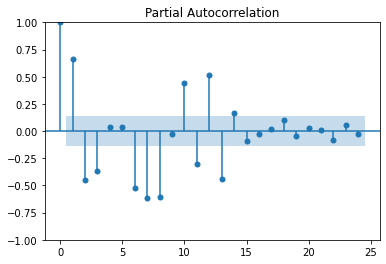

In [304]:
plot_pacf(decomposition.seasonal);

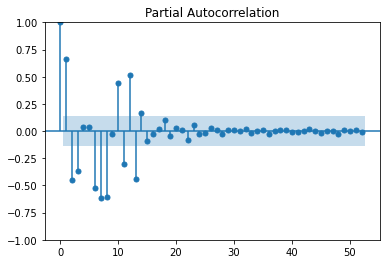

In [305]:
plot_pacf(decomposition.seasonal, lags = 52);

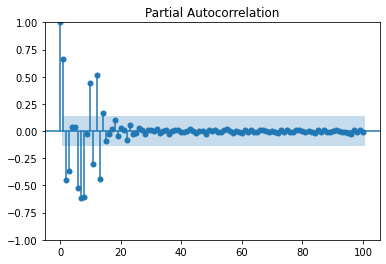

In [306]:
plot_pacf(decomposition.seasonal, lags = 100);

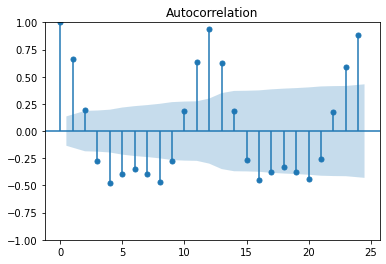

In [307]:
plot_acf(decomposition.seasonal);

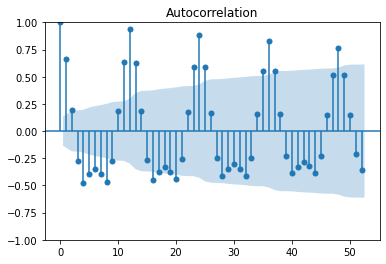

In [308]:
plot_acf(decomposition.seasonal, lags = 52);

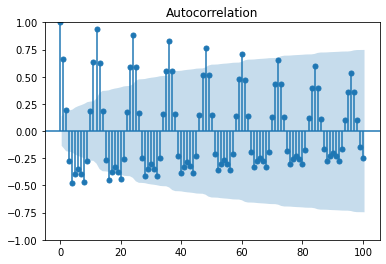

In [309]:
plot_acf(decomposition.seasonal, lags = 100);

### SARIMA

In [310]:
#seasonal_order = (1,1,1,12)

In [311]:
adfuller(decomposition.seasonal)

(-1441183010136215.0,
 0.0,
 12,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 -12926.759941060529)

In [312]:
sari_mod =SARIMAX(train_data,
                  order=(1, 1, 1),
                  seasonal_order=(9, 0, 8, 12),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()

In [313]:
sari_mod.predict()

Date
2018-06-03      0.000000
2018-06-10     47.560152
2018-06-17     48.379259
2018-06-24     47.524994
2018-07-01     46.297496
                 ...    
2022-05-08    158.132980
2022-05-15    159.682443
2022-05-22    146.520601
2022-05-29    140.491928
2022-06-05    146.139944
Freq: W-SUN, Name: predicted_mean, Length: 210, dtype: float64

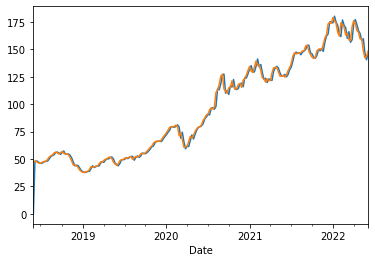

In [314]:
sari_mod.predict().plot();
train_data.plot();

In [315]:
sari_mod.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

2022-06-12    150.651275
2022-06-19    150.382400
2022-06-26    149.273372
2022-07-03    148.768293
2022-07-10    148.378328
2022-07-17    147.622411
2022-07-24    148.741883
2022-07-31    148.424663
2022-08-07    149.126399
2022-08-14    149.441699
2022-08-21    150.139287
2022-08-28    149.755098
2022-09-04    148.969352
2022-09-11    149.358232
2022-09-18    149.900131
2022-09-25    149.815618
2022-10-02    150.107141
2022-10-09    151.696316
2022-10-16    151.775455
2022-10-23    152.982550
2022-10-30    153.106365
2022-11-06    153.350113
2022-11-13    153.500984
2022-11-20    153.146073
2022-11-27    152.708752
2022-12-04    152.587919
2022-12-11    152.435263
2022-12-18    153.127176
2022-12-25    152.962124
2023-01-01    152.189962
2023-01-08    153.066832
2023-01-15    153.741035
2023-01-22    154.144855
2023-01-29    153.030458
2023-02-05    154.312291
2023-02-12    153.694761
2023-02-19    152.454709
2023-02-26    152.918996
2023-03-05    153.659665
2023-03-12    152.776939


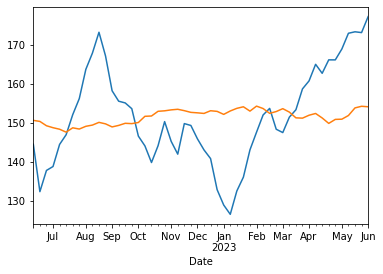

In [316]:
test_data.plot();
sari_mod.predict(start=test_data.index[0], end=test_data.index[-1]).plot();

### SARIMA Model

In [317]:
sari_mod = SARIMAX(train_data,
                  order=(1, 1, 1),
                  seasonal_order=(9, 0, 8, 12),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()

In [318]:
for train_ind, val_ind in split.split(train_w_ind):
    sarimax = SARIMAX(endog=train_w_ind.iloc[train_ind, -1],
                      order=(1, 1, 1),
                      seasonal_order=(9, 0, 8, 12),
                      enforce_stationarity=True,
                      enforce_invertibility=True).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_w_ind.iloc[val_ind, -1]
    
    print(np.sqrt(mean_squared_error(true, preds)))

6.976875445450273
17.311845092614416
36.94361734057174
13.148562472790164
23.042316013449323


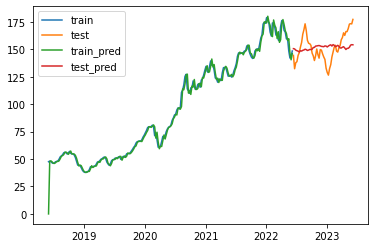

In [319]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test_data.index[0], end=test_data.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_data, label='train')
ax.plot(test_data, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

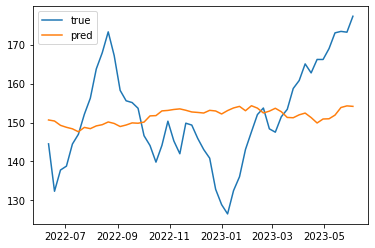

In [320]:
# Let's zoom in on test
fig, ax = plt.subplots()

ax.plot(test_data, label='true')
ax.plot(y_hat_test, label='pred')

plt.legend();

In [321]:
np.sqrt(mean_squared_error(test_data, y_hat_test))

12.908619305373424

### Forecast

In [322]:
sari_mod1 = SARIMAX(apple_prices_wk,
                   order=(1, 1, 1),
                   seasonal_order=(9, 0, 8, 12),
                   enforce_stationarity=True,
                   enforce_invertibility=True).fit()

In [323]:
forecast = sari_mod1.forecast(steps=52)

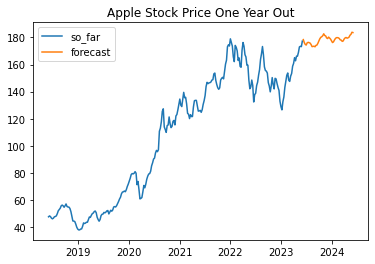

In [324]:
fig, ax = plt.subplots()
ax.plot(apple_prices_wk, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('Apple Stock Price One Year Out')

plt.legend();

In [325]:
forecast

2023-06-11    178.391244
2023-06-18    176.179150
2023-06-25    174.805199
2023-07-02    174.388149
2023-07-09    176.066139
2023-07-16    176.355305
2023-07-23    176.156327
2023-07-30    175.805444
2023-08-06    174.732081
2023-08-13    173.209150
2023-08-20    173.339690
2023-08-27    173.542421
2023-09-03    173.082421
2023-09-10    174.100443
2023-09-17    174.360915
2023-09-24    175.680415
2023-10-01    177.409541
2023-10-08    179.029938
2023-10-15    180.083525
2023-10-22    180.533599
2023-10-29    181.265402
2023-11-05    182.675598
2023-11-12    181.434606
2023-11-19    181.087580
2023-11-26    179.610867
2023-12-03    179.166240
2023-12-10    180.243697
2023-12-17    179.546989
2023-12-24    178.745814
2023-12-31    177.494466
2024-01-07    176.215704
2024-01-14    176.683118
2024-01-21    178.049639
2024-01-28    179.182384
2024-02-04    179.809279
2024-02-11    179.849259
2024-02-18    179.721307
2024-02-25    179.201231
2024-03-03    178.201125
2024-03-10    178.015128


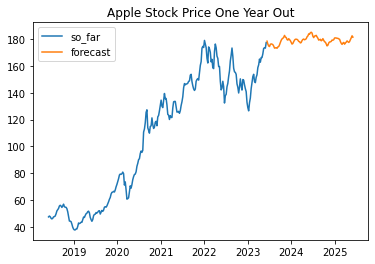

In [327]:
forecast2 = sari_mod1.forecast(steps=104)

fig, ax = plt.subplots()
ax.plot(apple_prices_wk, label='so_far')
ax.plot(forecast2, label='forecast')
ax.set_title('Apple Stock Price One Year Out')

plt.legend();

In [328]:
forecast2

2023-06-11    178.391244
2023-06-18    176.179150
2023-06-25    174.805199
2023-07-02    174.388149
2023-07-09    176.066139
                 ...    
2025-05-04    178.109263
2025-05-11    179.537074
2025-05-18    180.882555
2025-05-25    182.370499
2025-06-01    181.406500
Freq: W-SUN, Name: predicted_mean, Length: 104, dtype: float64

## Evaluation

The Apple stock would be the best company to predict future prices as it has a 250% rate of return (ROI) in 5 years compared to the rest of the FAANG companies.

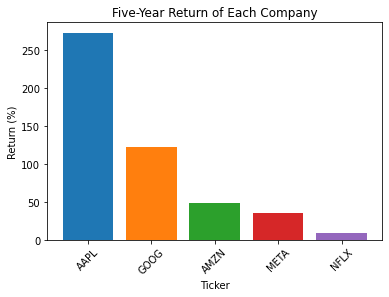

In [336]:
returns_sorted = returns.sort_values(ascending=False)
colors = plt.cm.tab10(range(len(returns_sorted)))

plt.bar(returns_sorted.index, returns_sorted, color=colors)
plt.xlabel('Ticker')
plt.ylabel('Return (%)')
plt.title('Five-Year Return of Each Company')
plt.xticks(rotation=45)
plt.show()

This heatmap also shows the closing stock price of Apple from June 2018 to May 2023. The price ranges from 40 (USD) to 180 (USD) in the past 5 years.

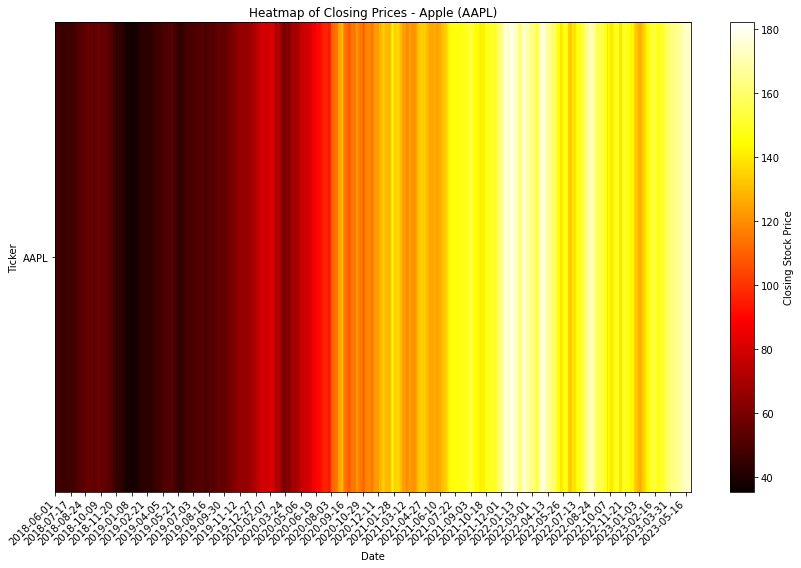

In [330]:
# Create the heatmap for Apple
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df['AAPL'].values.reshape(1, -1), cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = [0]  # Only one company, so set a single tick position
y_tick_labels = ['AAPL']  # Set the label for Apple
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add a box for Apple
rect = Rectangle((-0.5, -0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Stock Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices - Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

Then, a SARIMA Model was used for our train-test split data in order to set up the predictions for June 2023-May 2024.

For our SARIMA model, an order of (1, 1, 1) and a seasonal order (9, 0, 8, 12) was used as it averaged out the Apple prices on the test data.

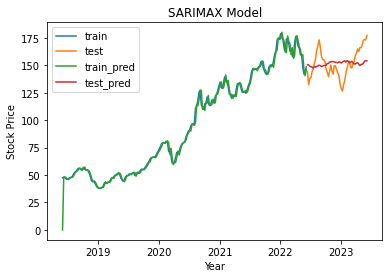

In [331]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test_data.index[0], end=test_data.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_data, label='train')
ax.plot(test_data, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

ax.set_title('SARIMAX Model')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')

plt.legend();

Our true and predicted data are not aligned, however the predicted data averages the true data from July 2022 to May 2023. 

To get a better representation of the variable prices, a root mean squared-error was used.

In this case, the calculated RMSE value is 12.908619305373424. This means that, on average, the predictions of the SARIMAX model have an error of approximately 12.91 (USD) when compared to the actual values. A lower RMSE value indicates better accuracy, so you would ideally want a lower value for the RMSE.

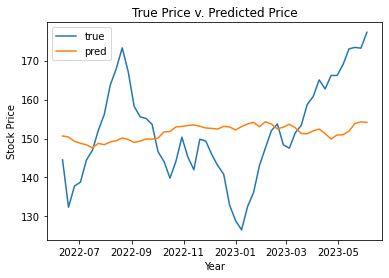

In [333]:
fig, ax = plt.subplots()

ax.plot(test_data, label='true')
ax.plot(y_hat_test, label='pred')

ax.set_title('True Price v. Predicted Price')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')

plt.legend();

## Conclusion

- Forecasted prices of the Apple stock price tends to generally average the peaks and valleys of the actual stock price instead of giving an identical return.

- Forecasted prices would be better for a long term investment rather than a short-term investment, as it is averaging out the values of the stock price, which is generally trending upwards.

- Apple would still be the best company to invest out of all the FAANG companies.

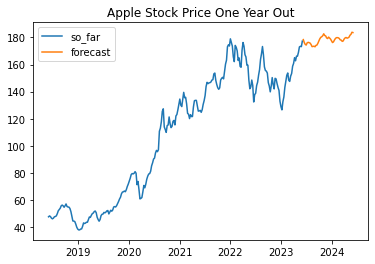

In [334]:
fig, ax = plt.subplots()
ax.plot(apple_prices_wk, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('Apple Stock Price One Year Out')

plt.legend();

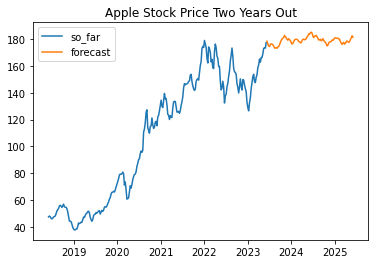

In [337]:
forecast2 = sari_mod1.forecast(steps=104)

fig, ax = plt.subplots()
ax.plot(apple_prices_wk, label='so_far')
ax.plot(forecast2, label='forecast')
ax.set_title('Apple Stock Price Two Years Out')

plt.legend();

## Next Steps

- SARIMA Model Iterations: Iterate more models with better accuracy instead of just retreiving a model that averages out the stock price in the future.

- Portfolio Diversity: looking into other companies instead of FAANG to invest in, and polling wither more years or less years depending on the type of investment, whether short term or long term.